## Semantic Inpainting

In [2]:
import time
import numpy as np
import tensorflow as tf

# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
%load_ext autoreload
%autoreload 2

## Training the model

In [3]:
from model import *

In [4]:
# For pre-loading data if first time using the dataset
my_iterator, _ = get_batches(10, dataset = 'celeba')
for i in range(3):
    images = next(my_iterator)

Dataset already present!


number of batches for training: 127
epoch 0 
Epoch: [ 0/ 2] [   0/ 127] time: 6.2763, d_loss: 28.79377365, g_loss: 0.00000000


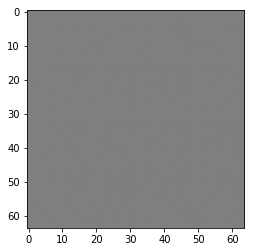

Epoch: [ 0/ 2] [  10/ 127] time: 39.7011, d_loss: 6.57438517, g_loss: 0.00140529
Epoch: [ 0/ 2] [  20/ 127] time: 65.7789, d_loss: 5.95418358, g_loss: 0.00261186
Epoch: [ 0/ 2] [  30/ 127] time: 92.3146, d_loss: 5.61878920, g_loss: 0.00365630
Epoch: [ 0/ 2] [  40/ 127] time: 120.4838, d_loss: 5.48271370, g_loss: 0.00418824
Epoch: [ 0/ 2] [  50/ 127] time: 150.4423, d_loss: 5.37981176, g_loss: 0.00464350
Epoch: [ 0/ 2] [  60/ 127] time: 176.7288, d_loss: 5.32503653, g_loss: 0.00490093
Epoch: [ 0/ 2] [  70/ 127] time: 204.8841, d_loss: 5.27662897, g_loss: 0.00514289
Epoch: [ 0/ 2] [  80/ 127] time: 230.6437, d_loss: 5.25520849, g_loss: 0.00524773
Epoch: [ 0/ 2] [  90/ 127] time: 257.9745, d_loss: 5.30077839, g_loss: 0.00501357
Epoch: [ 0/ 2] [ 100/ 127] time: 284.8304, d_loss: 5.16281796, g_loss: 0.00575362


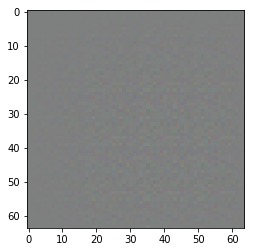

Epoch: [ 0/ 2] [ 110/ 127] time: 318.6081, d_loss: 5.20571470, g_loss: 0.00551243
Epoch: [ 0/ 2] [ 120/ 127] time: 345.4956, d_loss: 5.13054323, g_loss: 0.00594181
epoch 1 
Epoch: [ 1/ 2] [   3/ 127] time: 373.0804, d_loss: 5.15066099, g_loss: 0.00582204
Epoch: [ 1/ 2] [  13/ 127] time: 397.4936, d_loss: 5.12029076, g_loss: 0.00599884
Epoch: [ 1/ 2] [  23/ 127] time: 425.2987, d_loss: 5.14913988, g_loss: 0.00583067
Epoch: [ 1/ 2] [  33/ 127] time: 453.0878, d_loss: 5.17940331, g_loss: 0.00565574
Epoch: [ 1/ 2] [  43/ 127] time: 478.8552, d_loss: 5.12720680, g_loss: 0.00596357
Epoch: [ 1/ 2] [  53/ 127] time: 508.8138, d_loss: 5.10182714, g_loss: 0.00611239
Epoch: [ 1/ 2] [  63/ 127] time: 535.6639, d_loss: 5.17923164, g_loss: 0.00565768
Epoch: [ 1/ 2] [  73/ 127] time: 562.5481, d_loss: 5.10678530, g_loss: 0.00608358


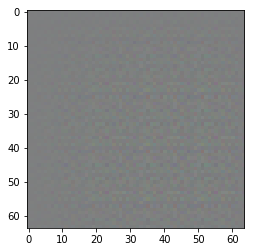

Epoch: [ 1/ 2] [  83/ 127] time: 598.3123, d_loss: 5.11090803, g_loss: 0.00606255
Epoch: [ 1/ 2] [  93/ 127] time: 626.1879, d_loss: 5.15408087, g_loss: 0.00580303
Epoch: [ 1/ 2] [ 103/ 127] time: 652.1821, d_loss: 5.08968449, g_loss: 0.00619115
Epoch: [ 1/ 2] [ 113/ 127] time: 678.2028, d_loss: 5.12121058, g_loss: 0.00599770
Epoch: [ 1/ 2] [ 123/ 127] time: 704.3081, d_loss: 5.15124512, g_loss: 0.00582289


<Figure size 432x288 with 0 Axes>

In [25]:
with tf.Session() as sess:
    model = DCGAN(sess, input_height=64, input_width=64, batch_size=64, sample_num = 64, output_height=64, output_width=64,
                 g_dim=[1024, 512, 256, 128], d_dim=[64, 128, 256, 512], s_size=4, z_dim=100, dataset='cars')
    #model.build_model()
    model.train(epochs=2, batch_size=64, learning_rate=0.0002, beta1=0.5)